# House Price Prediction with Linear Regression

### Author: Eren ERİŞ


In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats #İstatistik Kütüphanesi

from sklearn.model_selection import train_test_split;
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
# Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.api._v2.keras import activations
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

In [146]:
#Test ve Train Data Setlerini Yukleme
df_train=pd.read_csv('train.csv');
df_test=pd.read_csv('test.csv');

In [147]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [148]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [149]:
#Veri Birleştirme Yapmadan Önce kaçar adet datadan oluştuğunu öğrenme
df_train.shape , df_test.shape

((1460, 81), (1459, 80))

In [150]:
# Train ve test veri setlerini alt alta birleştir
df = pd.concat([df_train, df_test], ignore_index=True)

In [151]:
df.shape

(2919, 81)

In [123]:
df.info()#Variable Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [152]:
df.describe() #statistical data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [153]:
df.corr(numeric_only=True) #Correlation Data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,0.018251,-0.014453,-0.024924,-0.008678,-0.022252,-0.037816,-0.029046,0.000145,0.010387,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,-0.026666,-0.010208,-0.008865,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.009950,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.087898,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,0.458247,0.026545,0.004894,0.382462,0.113245,-0.025629,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.076673,0.310587,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.128349,0.026292,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008628,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.164543,-0.040732,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.571803,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,-0.138202,-0.174002,-0.157418,0.005494,0.009048,-0.116569,-0.042133,0.084181,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.325849,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.211580,-0.030282,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.834812,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.134947,-0.046285,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.652365,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,0.395834,0.121014,-0.057912,0.402994,0.141593,0.015006,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.255112,0.361190,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.638847,0.078361,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.194270,0.255482,0.310449,0.223492,0.124163,-0.099712,

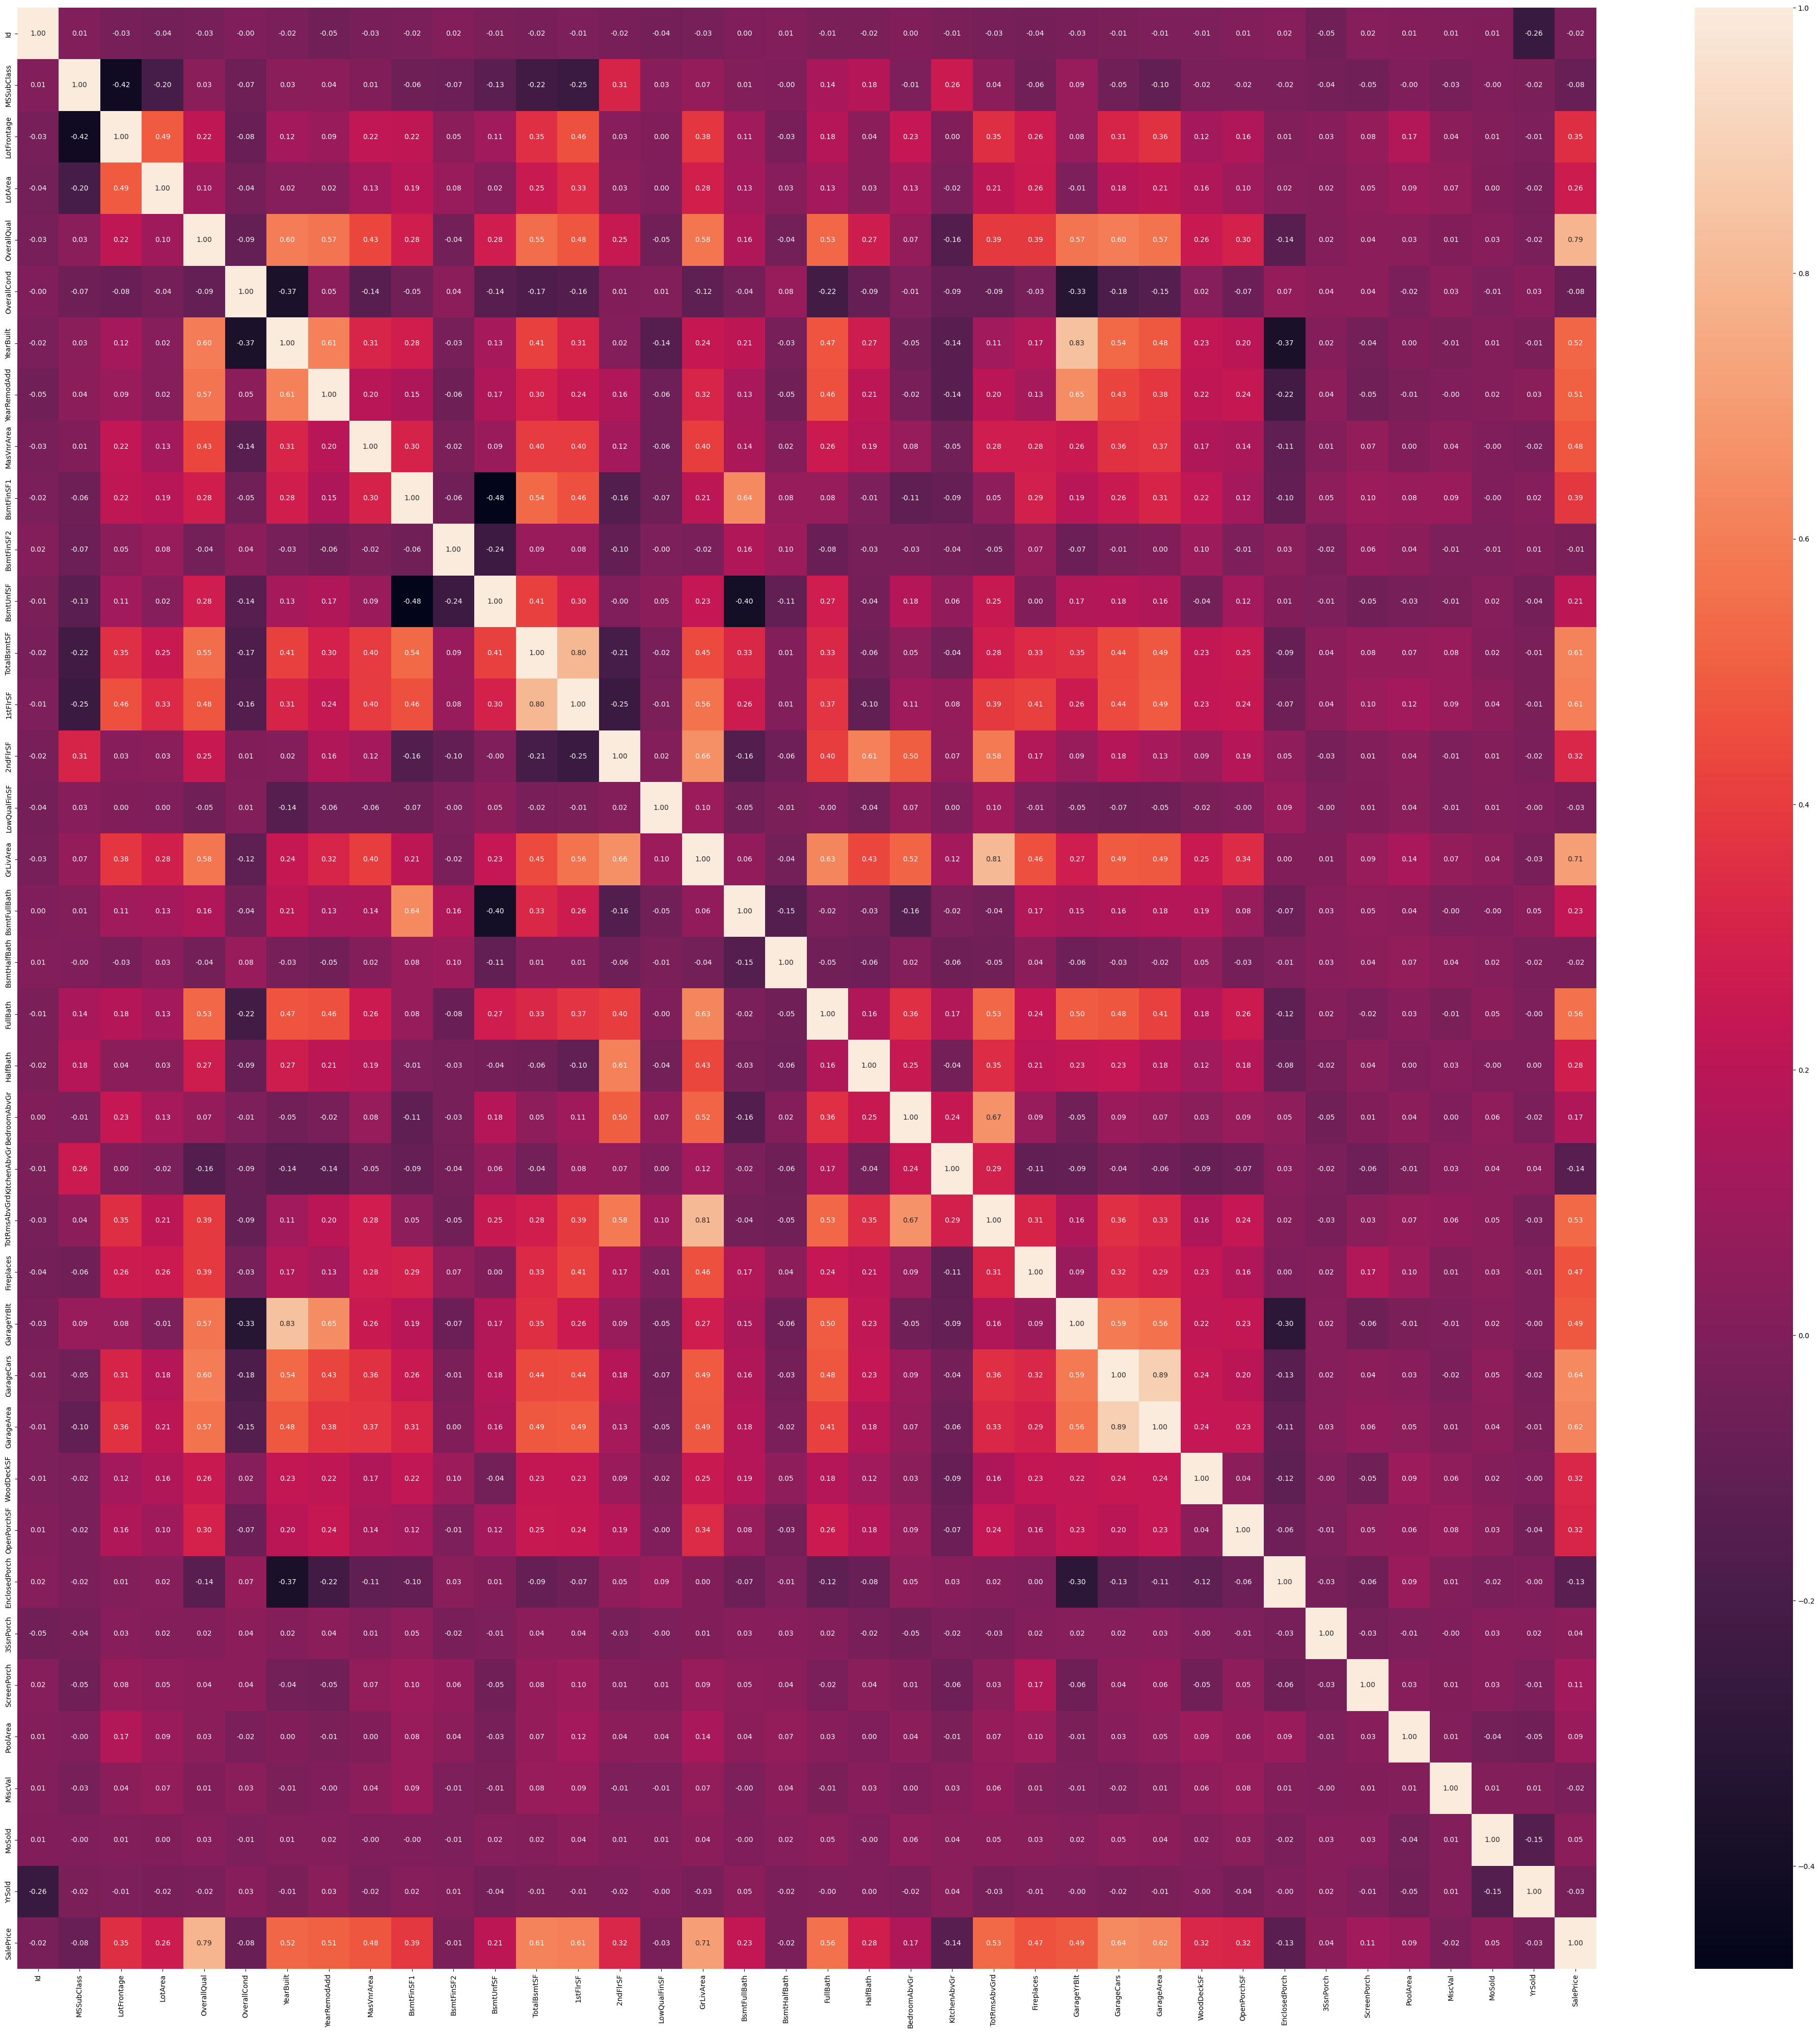

In [126]:
plt.figure(figsize=(50, 50))  # Örnek olarak 10x8 boyutunda bir plot
sns.heatmap(df.corr(numeric_only=True), annot=True ,  fmt='.2f')
plt.show()

In [154]:
with pd.option_context('display.max_rows', None,):
    print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [127]:
#Eğer Bir columnun %75 ninden fazlası boş ise o sütün değerlendirmeye alınmaz silinebilir.2100 fazla verisi boş 
#olanaları sileceğiz
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)


In [155]:
#Boş verileri doldurma...

# LotFrontage İçin Tüm mülkler cadde ile bağlı olmayabilir. Bu sebeple bunları 0 yapabilriz
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['Utilities'] = df['Utilities'].fillna(0)

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode().iloc[0])

#Exterior1st sütünü için en çok kullanılan kaplama türünü secelim.
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode().iloc[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode().iloc[0])
#Masonry veneer type için olmayanlarda duvar kaplama olmayabilir bunlara Yok olarak iş
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrArea'] = df.groupby('MasVnrType')['MasVnrArea'].transform(lambda x: x.fillna(x.mean()) if x.notna().any() else x)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode().iloc[0])
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
#Bodruma sahip olmayan evleri None olarak gruplandıralım..
df['BsmtQual'] = df['BsmtQual'].fillna("None")
df['BsmtCond'] = df['BsmtCond'].fillna("None")
df['BsmtExposure'] = df['BsmtExposure'].fillna("None")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("None")
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
#Eğer Bir evein Bir bodrumu yoksa 2. si olamaz Bus ebeple bunlarıda None yapalım
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("None")
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode().iloc[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode().iloc[0])

#Şömine Olmayanların Kalitesini 0 girebilriiz-- Olanların ise o gruptaki ortalamasını girebilriiz
df['FireplaceQu'] = df.groupby('Fireplaces')['FireplaceQu'].transform(lambda x: x.fillna(x.mode().iloc[0]) if x.notna().any() else x)
df['FireplaceQu'] = df['FireplaceQu'].fillna("None")

#Garaj olmayanları None olarak işaretleyelim -Garajla alakalı  Diğer verileride None olarak işaretleyelim
df['GarageType'] = df['GarageType'].fillna("None")
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna("None")
df['GarageQual'] = df['GarageQual'].fillna("None")
df['GarageCond'] = df['GarageCond'].fillna("None")

df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)

df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode().iloc[0])

In [24]:
with pd.option_context('display.max_rows', None,):
    print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [53]:
def find_col_dtypes(data, ord_th):
    num_cols = data.select_dtypes("number").columns.to_list()
    cat_cols = data.select_dtypes("object").columns.to_list()
    
    ordinals = [col for col in num_cols if data[col].nunique() < ord_th]
    
    num_cols = [col for col in num_cols if col not in ordinals]
    
    return num_cols, ordinals, cat_cols

num_cols, ordinals, cat_cols = find_col_dtypes(df, 20)

print(f"Num Cols: {num_cols}", end="\n\n")
print(f"Cat Cols: {cat_cols}", end="\n\n")
print(f"Ordinal Cols: {ordinals}")

Num Cols: ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']

Cat Cols: []

Ordinal Cols: ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']


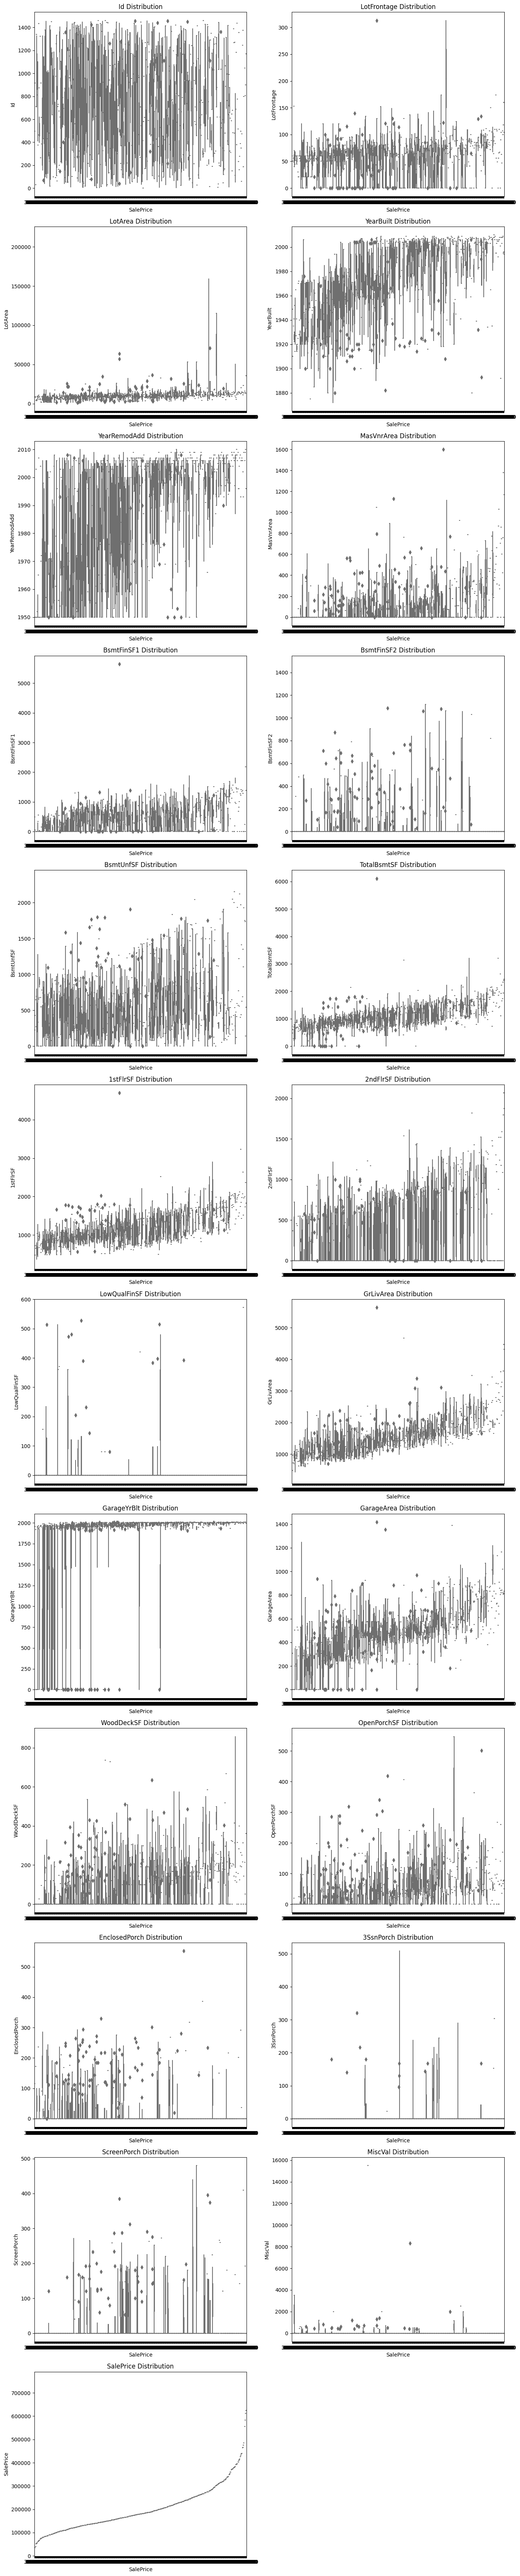

In [55]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="SalePrice", y=column, data=df,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\EREN\AppData\Local\Temp\ipykernel_39132\3453550780.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


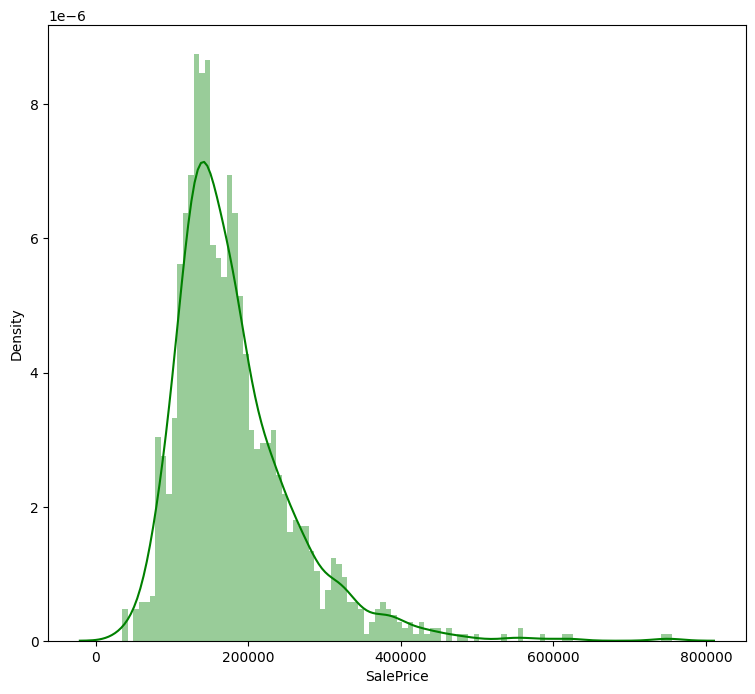

In [102]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [159]:
df_dum=pd.get_dummies(df,drop_first=True)

In [160]:
train = df_dum[:1460]
test=df_dum[1460:]

In [174]:
def metrics(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    r2_s = r2_score(true, pred)
    return mse, mae, r2_s

In [161]:
x=train.drop('SalePrice',axis=1)
y=train['SalePrice']

In [168]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=42)

In [210]:
#Modelleri Kaydetmek İçin Kullanacağımız Değişkenler
model_names = []
train_mses = []
test_mses = []
train_maes = []
test_maes = []
train_r2s = []
test_r2s = []

In [211]:
model_name = "LinearRegression"

# Model Oluşturma
lr = LinearRegression()
lr.fit(x_train, y_train)

# Hesaplama
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Grafik Çizmek İçin Değişkene Atama
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2*100)
test_r2s.append(test_r2*100)

# Sonuçları yazdırma
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2*100)
print("Test R2    :", test_r2*100)

Model Name : LinearRegression
Train MSE  : 377392754.8757418
Test MSE   : 1.1972558767202056e+30
Train MAE  : 12587.434483358305
Test MAE   : 91199832334579.39
Train R2   : 93.67273757707345
Test R2    : -1.5608930368546413e+22


In [212]:
model_name = "SupportVectorRegression"

# Model Oluşturma
svr = SVR()
svr.fit(x_train, y_train)

# Hesaplama
train_pred = svr.predict(x_train)
test_pred = svr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Grafik Çizmek İçin Değişkene Atama
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2*100)
test_r2s.append(test_r2*100)

# Sonuçları yazdırma
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2*100)
print("Test R2    :", test_r2*100)

Model Name : SupportVectorRegression
Train MSE  : 6231893228.958431
Test MSE   : 7858360294.151675
Train MAE  : 54524.94461270926
Test MAE   : 59541.757119865906
Train R2   : -4.482196178519304
Test R2    : -2.451448372409004


In [213]:
model_name = "DecisionTreeRegression"

# Model Oluşturma
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

# Hesaplama
train_pred = dtr.predict(x_train)
test_pred = dtr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Grafik Çizmek İçin Değişkene Atama
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Sonuçları yazdırma
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2*100)
print("Test R2    :", test_r2*100)

Model Name : DecisionTreeRegression
Train MSE  : 0.0
Test MSE   : 1881121998.7636986
Train MAE  : 0.0
Test MAE   : 28034.078767123287
Train R2   : 100.0
Test R2    : 75.47533249627531


In [214]:
model_name = "DecisionTreeRegression(MD=5)"

# Model Oluşturma
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train, y_train)

# Hesaplama
train_pred = dtr.predict(x_train)
test_pred = dtr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Grafik Çizmek İçin Değişkene Atama
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2*100)
test_r2s.append(test_r2*100)

# Sonuçları yazdırma
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2*100)
print("Test R2    :", test_r2*100)

Model Name : DecisionTreeRegression(MD=5)
Train MSE  : 821017524.401068
Test MSE   : 1551633394.6275873
Train MAE  : 21289.56516647886
Test MAE   : 27511.28283135003
Train R2   : 86.23504753710105
Test R2    : 79.77095950399476


In [215]:
model_name = "RandomForestRegression"

# Model Oluşturma
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Hesaplama
train_pred = rfr.predict(x_train)
test_pred = rfr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Grafik Çizmek İçin Değişkene Atama
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2*100)
test_r2s.append(test_r2*100)

# Sonuçları yazdırma
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2*100)
print("Test R2    :", test_r2*100)

Model Name : RandomForestRegression
Train MSE  : 141672013.49362502
Test MSE   : 880862311.6223301
Train MAE  : 6670.744914383562
Test MAE   : 17802.318698630137
Train R2   : 97.62476625272338
Test R2    : 88.51597327377083


In [223]:
model_evals = pd.DataFrame(data={
    "Name": model_names,
    "Train MSE": train_mses,
    "Test MSE": test_mses,
    "Train MAE": train_maes,
    "Test MAE": test_maes,
    "Train R2": train_r2s,
    "Test R2": test_r2s
})

In [217]:
model_evals

,Name,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,LinearRegression,3.773928e+08,1.197256e+30,12587.434483,9.119983e+13,93.672738,-1.560893e+22
1,SupportVectorRegression,6.231893e+09,7.858360e+09,54524.944613,5.954176e+04,-4.482196,-2.451448e+00
2,DecisionTreeRegression,0.000000e+00,1.881122e+09,0.000000,2.803408e+04,1.000000,7.547533e-01
3,DecisionTreeRegression(MD=5),8.210175e+08,1.551633e+09,21289.565166,2.751128e+04,86.235048,7.977096e+01
4,RandomForestRegression,1.416720e+08,8.808623e+08,6670.744914,1.780232e+04,97.624766,8.851597e+01


Text(0.5, 1.0, 'Train MSE Bar Graph')

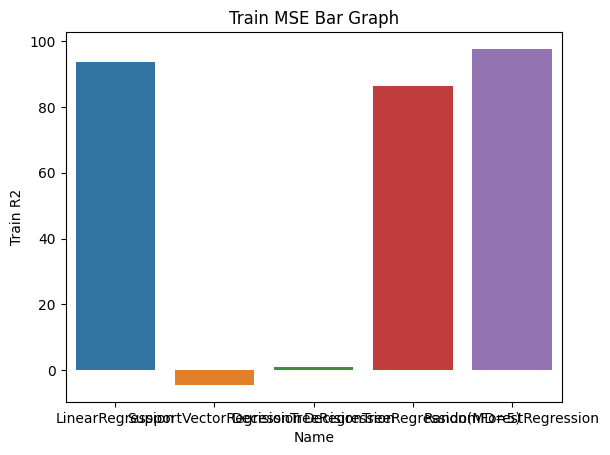

In [219]:
# Train R2 Bar Graph
train_mse_bar = sns.barplot(model_evals, x = "Name", y = "Train R2")
train_mse_bar.set_title("Train MSE Bar Graph")  # Grafik başlığı


Text(0.5, 1.0, 'Test MSE Bar Graph')

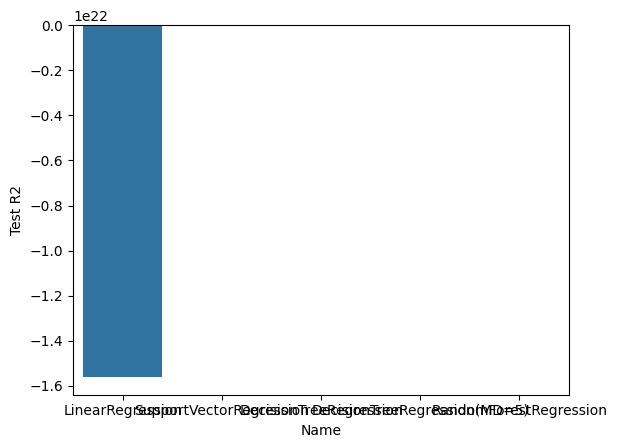

In [240]:

# Test R2 Bar Graph
test_mse_bar = sns.barplot(model_evals, x = "Name", y = "Test R2")
train_mse_bar.set_title("Test MSE Bar Graph")  # Grafik başlığı

In [228]:
#Deep Learnin İle
x_new = x.astype('float32')


In [229]:
# Verileri normalleştirin
scaler = StandardScaler()
x_new = scaler.fit_transform(x_new)

In [245]:
model = keras.Sequential([
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])


In [247]:
# Modeli derle
#optimizer = keras.optimizers.Adam(learning_rate=0.5)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Modeli eğit
model.fit(x_new, y, epochs=100, batch_size=8, validation_split=0.2)


Epoch 1/100
146/146 [==============================] - 1s 3ms/step - loss: 12523233280.0000 - mae: 88592.6797 - val_loss: 5026103296.0000 - val_mae: 52932.5312
Epoch 2/100
146/146 [==============================] - 0s 2ms/step - loss: 10190007296.0000 - mae: 78476.9141 - val_loss: 8563798528.0000 - val_mae: 81509.8516
Epoch 3/100
146/146 [==============================] - 0s 2ms/step - loss: 12252015616.0000 - mae: 88251.0234 - val_loss: 4348809728.0000 - val_mae: 52141.9570
Epoch 4/100
146/146 [==============================] - 0s 2ms/step - loss: 28029356032.0000 - mae: 113868.9922 - val_loss: 44277215232.0000 - val_mae: 186240.3906
Epoch 5/100
146/146 [==============================] - 0s 2ms/step - loss: 24507932672.0000 - mae: 124931.9609 - val_loss: 13967848448.0000 - val_mae: 98121.4922
Epoch 6/100
146/146 [==============================] - 0s 2ms/step - loss: 21658830848.0000 - mae: 119214.3594 - val_loss: 15615849472.0000 - val_mae: 108968.8984
Epoch 7/100
146/146 [===========

In [239]:
# Modelin performansını değerlendirin
mse = model.evaluate(x_new, y_new)
print(f'Test Mean Squared Error: {mse}')

46/46 [==============================] - 0s 963us/step - loss: 1184494848.0000 - mae: 19831.8184
Test Mean Squared Error: [1184494848.0, 19831.818359375]


In [244]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64